## Clustering

Let’s suppose we give a child different objects to group. How does a child make a group? The child may group over the colour, over the shape, over the hardness or softness of the objects etc. The basic idea here is that the child tries to find out similarities and dissimilarities between different objects and then tries to make a group of similar objects. This is called **clustering**, the method of identifying similar instances and keeping them together.
In Other words, clustering identifies homogeneous subgroups among the observations.


Clustering is an unsupervised approach which finds a structure/pattern in a collection of unlabeled data.
A cluster is a collection of objects which are “similar” amongst themselves and are “dissimilar” to the objects belonging to a different cluster.
For example:


<img src="https://summerofhpc.prace-ri.eu/wp-content/uploads/2013/07/k-means_ilustration.png">


In the figure above, we can easily identify 4 different clusters. The clustering criteria here is distance. Whichever points are near to each other are kept in the same cluster and the faraway points belong to a different cluster

# KMeans Clustering

It is an unsupervised technique used to identify clusters of data objects in the dataset. K specifies the number of clusters.

Steps involved in K-Means Algorithm:

1. Initially choose the number of K clusters.

2. Start with K centroids by putting them at random place (not necessarily from your dataset). **A centroid is a data point (imaginary or real) at the center of a cluster.**

3. Assign each point to the closest centroid. That forms k cluster. Compute distance of every point from centroid.

4. Compute and place the new centroid for each cluster ie., calculate the mean value of the objects for each cluster and update the cluster mean.

5. Repeat the process again ie., reassign each data point to the new closest centroid. If any reassignment took place, go to step 4. But if there is no change ie., when clusters form a clear boundary, then stop.





## Problem statement: With the iris dataset we need to cluster iris flowers into certain groups.

In [1]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
data = pd.read_csv('iris.csv')

# checking the first 5 rows of our dataset
data.head()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,target
0,0,5.1,3.5,1.4,0.2,0
1,1,4.9,3.0,1.4,0.2,0
2,2,4.7,3.2,1.3,0.2,0
3,3,4.6,3.1,1.5,0.2,0
4,4,5.0,3.6,1.4,0.2,0


In [3]:
data.target.value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [4]:
# Quick summary of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    150 non-null    int64  
 1   sepal_length  150 non-null    float64
 2   sepal_width   150 non-null    float64
 3   petal_length  150 non-null    float64
 4   petal_width   150 non-null    float64
 5   target        150 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.2 KB


# EDA (Exploratory Data Analysis)

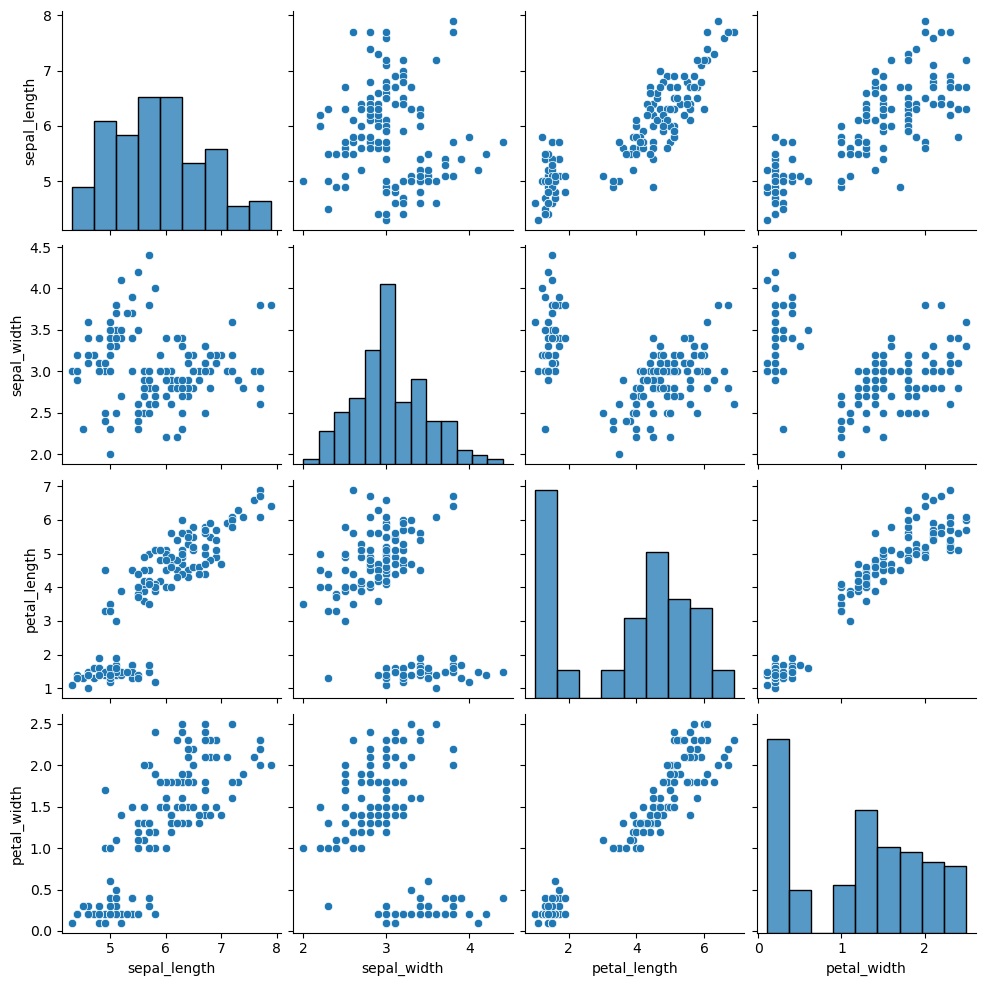

In [6]:
import seaborn as sns
sns.pairplot(data.drop(["Unnamed: 0","target"],axis=1))
# Creating dataframe only for numerical features.

In [7]:
# Statistical information of the dataset
data.drop(["Unnamed: 0","target"],axis=1).describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
# Check for null values
data.isnull().sum()
# there are no null values

Unnamed: 0      0
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

In [9]:
# Drop the unnamed column in the dataset
data.drop('Unnamed: 0', axis=1, inplace=True)

## Model Building

In [11]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
# Since it is an unsupervised learning, we need only the input variables
X= data.iloc[:,:-1]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [26]:
# Import KMeans Algorithm from Scikit-learn library
from sklearn.cluster import KMeans
# Initialise the model with K as 6
model = KMeans(n_clusters=6)
#Training the model
model.fit(X)

KMeans(n_clusters=6)

In [27]:
# labels of the clustersmodel.labels_)

In [28]:
# centroids of the clusters
model.cluster_centers_

array([[6.24722222, 2.84722222, 4.775     , 1.575     ],
       [4.71304348, 3.12173913, 1.4173913 , 0.19130435],
       [7.475     , 3.125     , 6.3       , 2.05      ],
       [5.25555556, 3.67037037, 1.5037037 , 0.28888889],
       [6.52916667, 3.05833333, 5.50833333, 2.1625    ],
       [5.53214286, 2.63571429, 3.96071429, 1.22857143]])

In [29]:
# Set colours to the clusters to differentiate(Not required in main impelemntation)
color_scheme = np.array(['red','blue','green','yellow','pink','cyan'])
color_scheme

array(['red', 'blue', 'green', 'yellow', 'pink', 'cyan'], dtype='<U6')

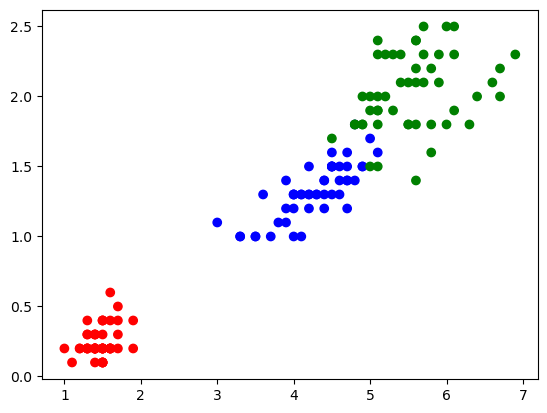

In [30]:
# Visualize the clusters in the original data(Not required in main impelemntation)
plt.scatter(data.petal_length,data.petal_width,color=color_scheme[data.target]) #Actual

In [31]:
data.target.value_counts() #Actual

0    50
1    50
2    50
Name: target, dtype: int64

In [32]:
model.labels_ #Predictions

array([3, 1, 1, 1, 3, 3, 1, 3, 1, 1, 3, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 3, 1, 1, 3, 3, 3, 1, 1, 3, 3, 3, 1, 1, 3, 1, 1, 3, 3, 1, 1, 3,
       3, 1, 3, 1, 3, 1, 0, 0, 0, 5, 0, 5, 0, 5, 0, 5, 5, 5, 5, 0, 5, 0,
       5, 5, 0, 5, 0, 5, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 0, 5, 0, 0, 0,
       5, 5, 5, 0, 5, 5, 5, 5, 5, 0, 5, 5, 4, 0, 2, 4, 4, 2, 5, 2, 4, 2,
       4, 4, 4, 0, 4, 4, 4, 2, 2, 0, 4, 0, 2, 0, 4, 2, 0, 0, 4, 2, 2, 2,
       4, 0, 0, 2, 4, 4, 0, 4, 4, 4, 0, 4, 4, 4, 0, 4, 4, 0])

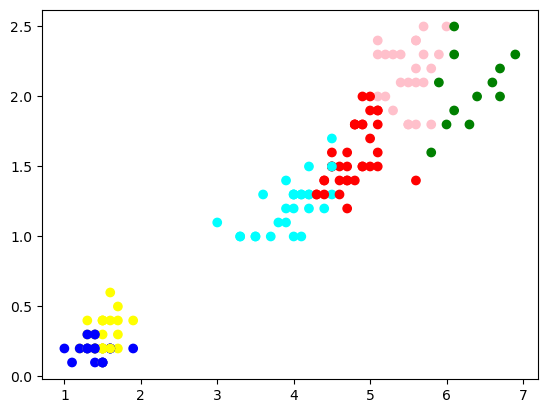

In [33]:
# visualize the clusters formed by the model(Not required in main impelemntation)
plt.scatter(X.petal_length,X.petal_width,color=color_scheme[model.labels_])

In [ ]:
data.head()

In [38]:
new_point=[[4.1,3.6,1.9,0.6]] # A new observation where it will go 
#means which cluster
model.predict(new_point)

array([1])

# Elbow Technique

Elbow method is the most popular method that is used to determine the optimal value of k.

**How it works?**

- Start with some K.
- Calculate WCSS (Within Cluster Sum of squared errors) ie., for each of the cluster, it calculate the distance of individual data points from the centroid, then square it and sum it up.
             WCSS = WCSS1 + WCSS2 + ..... WCSSk
             
- Take new value for K, repeat step2. 
- For each number of K, WCSS is calculated. 
- Find the elbow point. That is the optimal value of K.

[WCSS.png](attachment:WCSS.png)
 As the number of K increases, the error reduces. 
 


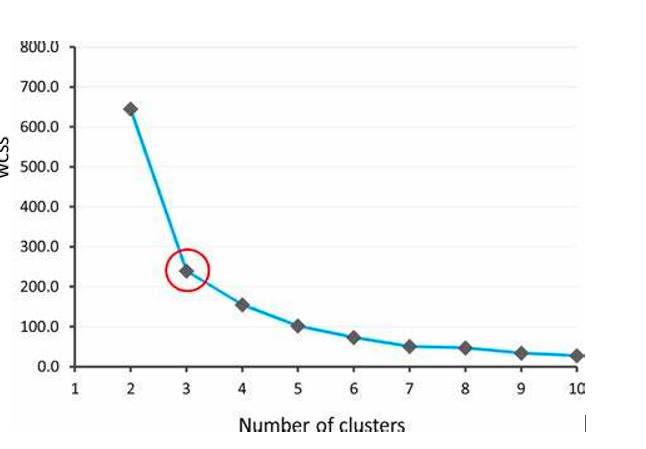

### Determine K using elbow method

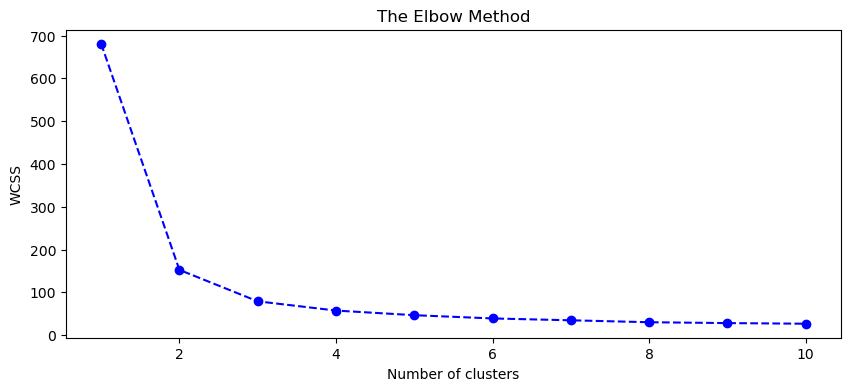

In [34]:
#elbow method
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,4))
plt.plot(range(1,11),wcss,ls="--",marker="o",color="b")
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie., the point after which the distortion/inertia start decreasing in a linear fashion.

In [35]:
# We will take the optimal value of k as 3
model = KMeans(n_clusters=3, random_state=42)

#Training the model
model.fit(X)

KMeans(n_clusters=3, random_state=42)

In [36]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [37]:
new_point=[[5.1,3.5,1.4,0.2]] # A new observation where it will go 
#means which cluster
model.predict(new_point)

array([1])

In [ ]:
data.head()

### Evaluation Metrics:

In [ ]:
label=model.labels_ #Predictions
label

from sklearn.metrics import silhouette_score
score=silhouette_score(X,label)
score #K=6

The range of Silhouette score is [-1, 1]. Its analysis is as follows −

+1 Score − Near +1 Silhouette score indicates that the sample is far away from its neighboring cluster.

0 Score − 0 Silhouette score indicates that the sample is on or very close to the decision boundary separating two neighboring clusters.

-1 Score − 1 Silhouette score indicates that the samples have been assigned to the wrong clusters.

The calculation of Silhouette score can be done by using the following formula

$$silhouette score\:=\:(p-q)/max(p,q)$$

Here, p = mean distance to the points in the nearest cluster

And, q = mean intra-cluster distance to all the points.

### Applications
The scikit-learn book describes the various applications of clustering as follows:

* __For customer segmentation:__ You can cluster your customers based on their purchases,their activity on your website, and so on. This is useful to understand who your customers are and what they need, so you can adapt your products and marketing campaigns to each segment. For example, this can be useful in recommender systems to suggest content that other users in the same cluster enjoyed.Subdivision of customers into groups/segments such that each customer segment consists of customers with similar market characteristics — pricing , loyalty, spending behaviors etc. Some of the segmentation variables could be e.g., number of items bought on sale, avg transaction value, total number of transactions. Customer segmentation allows businesses to customize market programs that will be suitable for each of its customer segments

* __For data analysis:__ When analyzing a new dataset, it is often useful to first discover clusters of similar instances, as it is often easier to analyze clusters separately.

* __Inventory Categorization based on sales or other manufacturing metrics.

* __For anomaly detection (also called outlier detection):__ Any instance that has a low affinity to all the clusters is likely to be an anomaly. For example, if you have clustered the users of your website based on their behavior, you can detect users with unusual behavior, such as an unusual number of requests per second, and so on. Anomaly detection is particularly useful in detecting defects in manufacturing, or for fraud detection.


* __For search engines:__ For example, some search engines let you search for images that are similar to a reference image. To build such a system, you would first apply a clustering algorithm to all the images in your database: similar images would end up in the same cluster. Then when a user provides a reference image, all you need to do is to find this image’s cluster using the trained clustering model, and you can then simply return all the images from this cluster.

* __To segment an image:__ By clustering pixels according to their color, then replacing each pixel’s color with the mean color of its cluster, it is possible to reduce the number of different colors in the image considerably. This technique is used in many object detection and tracking systems, as it makes it easier to detect the contour of each object.


##### Approaches for Clustering:
The clustering approaches can be broadly divided into two categories: _Agglomerative_ and _Divisive_.

**Agglomerative:** This approach first considers all the points as individual clusters and then finds out the similarity between two points, puts them into a cluster. Then it goes on finding similar points and clusters until there is only one cluster left i.e., all points belong to a big cluster. This is also called the bottom-up approach.

**Divisive:** It is opposite of the agglomerative approach. It first considers all the points to be part of one big cluster and in the subsequent steps tries to find out the points/ clusters which are least similar to each other and then breaks the bigger cluster into smaller ones. This continues until there are as many clusters as there are datapoints. This is also called the top-down approach.

### Assumption of K Means:
- Clusters are spatially grouped or spherical
- All features are scaled
- Clusters are of similar size

### Pros:
- Works well even when some assumptions are broken
- Simple and easy to implement
- Easy to interpret

### Cons:

- Sensitive to outliers
- k value has to be known before 

### Goal of Clustering

- Distance between centroid and its point should be minimum
- Intra-cluster distance should be less
- Distance between intercluster should be high